In [49]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load dataframe
data = pd.read_csv("profiles.csv")
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', -1)


In [2]:
print(data.head(1))


   age       body_type               diet    drinks  drugs  \
0  22   a little extra  strictly anything  socially  never   

                       education  \
0  working on college/university   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [3]:
print(data.columns)


Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [6]:
print(data.nunique().sort_values(ascending=False))

essay0         54350
essay1         51516
essay4         49260
essay5         48963
essay2         48635
essay7         45554
essay9         45443
essay6         43603
essay3         43533
essay8         39324
last_online    30123
speaks         7647 
ethnicity      217  
location       199  
height         60   
age            54   
sign           48   
religion       45   
education      32   
job            21   
diet           18   
offspring      15   
pets           15   
income         13   
body_type      12   
drinks         6    
smokes         5    
status         5    
orientation    3    
drugs          3    
sex            2    
dtype: int64


Right away, we  can clearly see the level of cleaning that is required on our dataset.

We will tackle this in several ways:

1) Identify all the categorical variables in our dataset and do the approriate mapping.
2) Clean up the essay questions and extract data from them.


In [7]:
print(data.religion.value_counts())

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it    927 
atheism and somewhat serious about it         848 
other and somewhat serious about it           846 
catholicism and laughing about it             726 
judaism and laughing about it                 681 
buddhism but not too serious ab

#### Data Exploration 

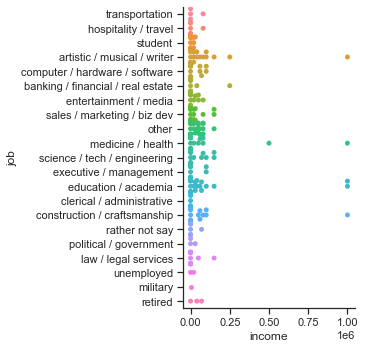

In [8]:
# PLot of income vs job 
sns.set(style="ticks", color_codes=True)

sns.catplot(x="income", y="job",kind='swarm',s=5, data=data[:500])
plt.show()
#print(tips.columns)



In [9]:
# From here we can see that 
# we can map `sex`, `drugs`, `orientation` , `status`, `smokes`, `drinks` as they
# have the least amount of unique columns and are categorical.

print(data.sex.value_counts())
label = 'M', 'F'


m    35829
f    24117
Name: sex, dtype: int64


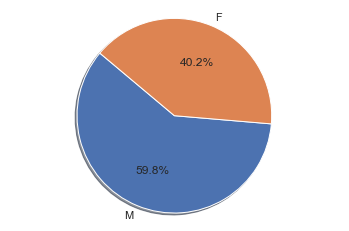

In [10]:
plt.pie(data.sex.value_counts(), labels = label,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

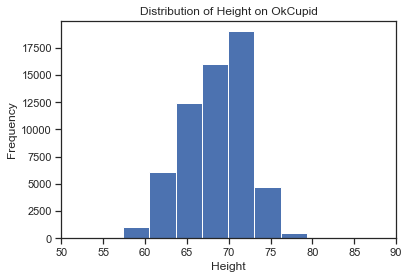

In [11]:
plt.hist(data.height, bins =30)
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.title("Distribution of Height on OkCupid")
plt.xlim(50,90)
plt.show()

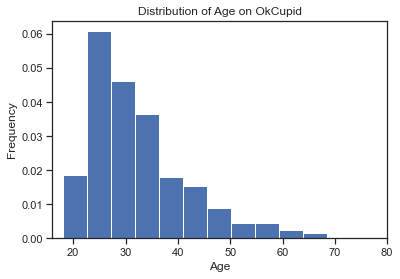

In [12]:
plt.hist(data.age,density=True, bins =20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age on OkCupid")
plt.xlim(16,80)
plt.show()


In [13]:
print(data.age.describe())

count    59946.000000
mean     32.340290   
std      9.452779    
min      18.000000   
25%      26.000000   
50%      30.000000   
75%      37.000000   
max      110.000000  
Name: age, dtype: float64


Statistical Test for normaility in our dataset

In [14]:
# # interpretation of our results
## Function to test our hypothesis
def testing_hypothesis(p):
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



In [15]:
### Testing for normallity 
from scipy.stats import shapiro
stat, p = shapiro(data['age'].sample(n=1000,random_state=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))
testing_hypothesis(p)


Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
stat, p = shapiro(data['height'].sample(n=1000,random_state=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))
testing_hypothesis(p)


Statistics=0.968, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:
stat, p = shapiro(data['income'].sample(n=1000,random_state=1))
print('Statistics=%.3f, p=%.3f' % (stat, p))
testing_hypothesis(p)

Statistics=0.208, p=0.000
Sample does not look Gaussian (reject H0)


### Mapping
 The dataset upon exploration different categories therefore we need to map some of these categories.

 The mappings below are easier done by hand as there are a few categories and would also like the mapping to retain meaning with the numbers with a higher  value meaning a higher likelihood.
 
 The mappings below of the columns are done so that we ca be able to encode *ranking* importance into our data by converting `string` into `integer`.
  

In [18]:
# Drugs mapping
drugs_mapping={'never':0,'sometimes':1, 'often':2}
data['drugs_mapped']=data.drugs.replace(drugs_mapping)

# Smoking mapping
smoke_mapping={'no':0 ,'trying to quit':1,'sometimes': 2,'when drinking':3,'yes':4 }
data['smoke_mapped']=data.smokes.replace(smoke_mapping)
data['smokes'] = data.smokes.fillna('no')

# Drinks mapping
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
data['drinks_mapped'] = data.drinks.replace(drink_mapping)

sex_mapping ={"m":0,"f":1}
data['sex_mapped']=data.sex.replace(sex_mapping)



In [19]:
## Function below maps our columns and is useful for columns 
# with a higher amount of categories which do not matter so 
# much the order.

def column_mapper(i):
    a=data[i].unique()
    b=list(range(0,len(a)))
    c =list(a)
    c = [x for x in list(a) if str(x) != 'nan'] # keeps nan values as nan
    data[i+'_mapped']=data[i].replace(dict(zip(c,b)))



In [20]:
column_mapper(i='status')
column_mapper(i='orientation')
column_mapper(i='job')

In [21]:
## The function below calculate the percentage of missing data
# from our table.

def missing_values_table(df):
    # Total missing values 
    mis_val = df.isnull().sum()

    # Percentage of missing values 
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table =pd.concat([mis_val,mis_val_percent], axis=1)

    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = { 0: 'Missing Values',1 : '% of Total Values'})

    #Sort the table by percentage of the missing descending

    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
        '% of Total Values', ascending=False).round(1)

    return mis_val_table_ren_columns

In [22]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values']> 40].index)


In [23]:
print(missing_df)


               Missing Values  % of Total Values
offspring      35561           59.3             
diet           24395           40.7             
religion       20226           33.7             
pets           19921           33.2             
essay8         19225           32.1             
drugs_mapped   14080           23.5             
drugs          14080           23.5             
essay6         13771           23.0             
essay9         12603           21.0             
essay7         12451           20.8             
essay3         11476           19.1             
sign           11056           18.4             
essay5         10850           18.1             
essay4         10537           17.6             
essay2         9638            16.1             
job            8198            13.7             
job_mapped     8198            13.7             
essay1         7572            12.6             
education      6628            11.1             
ethnicity      5680 

From the table below, we can see the percentage of missing values from each column

Below, we have a list of all the columns missing more than math{40/%} of their total values.
We decide to remove these columns.

In [24]:

print(missing_columns)
# drop the missing columns from our dataset
data = data.drop(columns=missing_columns)

['offspring', 'diet']


#### Handling essays 

The essays columns in our dataset contain a range of essays.

In [25]:
essay_cols = ['essay0','essay1','essay2','essay3','essay4','essay5','essay6','essay7','essay8','essay9']
#Remove  NaN columns
all_essays = data[essay_cols].replace(np.nan, '', regex=True)
# combine the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
data['combined_essays'] =all_essays

In [26]:
print(data.shape)

(59946, 37)


In [27]:
## Remove rows with (all 8-10 columns missing values)
data['no_miss'] = data[essay_cols].isnull().sum(axis=1)

data['tot_col'] = data.no_miss.apply(lambda x: 10-x)
indx_names = data[data['tot_col'] <= 2].index

data.drop(indx_names, inplace=True)

Our shape has changed below 

In [28]:
print(data.shape)

(55109, 39)


In [29]:
## Function to remove HTML tags
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)

In [30]:
## combined_essays_mod below has all the HTML tags and extra spaces and tags removed To provide much cleaner and human friendly text.

data['combined_essays_mod'] = data.combined_essays.apply(remove_tags).replace('  ',' ',regex=True).replace('\n',' ',regex=True)
data["essay_unique_words"] = data.combined_essays_mod.apply(lambda x: len(set(x.lower().split())))

In [31]:
## number of languages spoken 
# calculated by counting the number of languages listed. Note that further information can be obtained by calculating 
# the percentage of language fluency.
data['sum_lang_spoken'] = data.speaks.str.split(',').str.len()

# Length of essays
data["essay_len"] = data.combined_essays_mod.apply(lambda x: len(x))
# this is the default mean essay length we would use if there was no missing values in any of the essays
data["mean_essay_len"] = data.essay_len.apply(lambda x: x/10)

This is the modified mean essay length that is used which takes into account that some rows have missing essays.
It accounts for this and calculates the local mean for each of the rows.


In [32]:
data["mod_mean_essay_len"] = data.essay_len / data.tot_col
print(data.shape)

(55109, 45)


In [33]:
## We create new features by splitting the location into county and state. This enable for individual mappings

A =data.location.unique()
#print(A)
new= data.location.str.split(", ",n=1, expand=True)
data['county'] = new[0]
data['state'] = new[1]
#data.drop(columns =["location"], inplace = True) 
#print(data.head())

In [34]:
## We can also obtain the horoscope signs'.  

#print(data.sign.unique())
new_2= data.sign.str.split(" ",n=1, expand=True) # sign split by space 

data['star_sign'] = new_2[0]


In [35]:
#print(data.star_sign.head(20))

# mapping of state
column_mapper(i='state')

column_mapper(i='county')
# mapping of star_sign
column_mapper(i='star_sign')

In [36]:
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values']> 30].index)
print(missing_df)
print()
print(missing_columns)
data = data.drop(columns=missing_columns)


data  = data.drop(columns= essay_cols)


                  Missing Values  % of Total Values
religion          17885           32.5             
pets              17409           31.6             
essay8            14460           26.2             
drugs             13262           24.1             
drugs_mapped      13262           24.1             
sign              9548            17.3             
star_sign_mapped  9548            17.3             
star_sign         9548            17.3             
essay6            8993            16.3             
essay9            8099            14.7             
essay7            7750            14.1             
job_mapped        6893            12.5             
job               6893            12.5             
essay3            6812            12.4             
essay5            6267            11.4             
essay4            5883            10.7             
education         5406            9.8              
essay2            4974            9.0              
ethnicity   

In [37]:
print(missing_values_table(data))

                  Missing Values  % of Total Values
drugs             13262           24.1             
drugs_mapped      13262           24.1             
sign              9548            17.3             
star_sign         9548            17.3             
star_sign_mapped  9548            17.3             
job               6893            12.5             
job_mapped        6893            12.5             
education         5406            9.8              
ethnicity         4877            8.8              
body_type         4770            8.7              
smoke_mapped      4719            8.6              
drinks            2386            4.3              
drinks_mapped     2386            4.3              
speaks            38              0.1              
sum_lang_spoken   38              0.1              
height            2               0.0              


In [38]:
## Handling missing values in our columns


#default languages spoken set as 1
data['sum_lang_spoken'] = data['sum_lang_spoken'].fillna(1)

## Set default smoking drugs and drinks as 0.
data['smoke_mapped'] = data['smoke_mapped'].fillna(0)
data['drugs_mapped'] = data['drugs_mapped'].fillna(0)
data['drinks_mapped'] = data['drinks_mapped'].fillna(0)

In [39]:
## Modify to default 
data['drugs_mod'] = data.drugs.fillna('never')
data['smokes_mod'] = data.smokes.fillna('no')
data['drinks_mod'] = data.drinks.fillna('not at all')

In [40]:
## Set the height by mean of each sex  
data['height'] = round(data.groupby('sex')['height'].apply(lambda x: x.fillna(x.mean())),1)


print(missing_values_table(data))

                  Missing Values  % of Total Values
drugs             13262           24.1             
sign              9548            17.3             
star_sign         9548            17.3             
star_sign_mapped  9548            17.3             
job               6893            12.5             
job_mapped        6893            12.5             
education         5406            9.8              
ethnicity         4877            8.8              
body_type         4770            8.7              
drinks            2386            4.3              
speaks            38              0.1              


In [41]:
print(data.county_mapped.head())

0    0
1    1
2    2
3    3
4    2
Name: county_mapped, dtype: int64


### Features 
We will now select the features we would like to use to build future ML models 

In [42]:
feature_data = data[['age', 'height', 'income','drugs_mapped',
       'status_mapped', 'smoke_mapped', 'orientation_mapped', 
        'drinks_mapped', 'sex_mapped', 
        'essay_unique_words',
       'sum_lang_spoken', 'essay_len','mod_mean_essay_len','essay_unique_words',
        'state_mapped','star_sign','star_sign_mapped']]

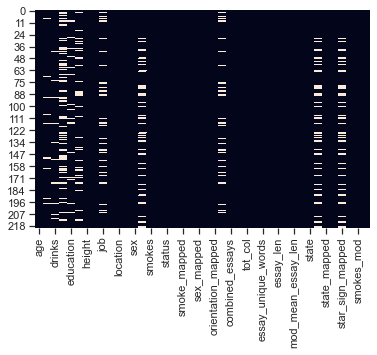

In [43]:

sns.heatmap(data.head(200).isnull(), cbar =False)
plt.show()


In [44]:
# print(missing_values_table(feature_data))

# print(feature_data.isnull().sum())

# print(feature_data.shape)

# print(feature_data.dtypes)
# print(feature_data.info())


# print(feature_data.nunique())

# print(data.info())
# print()





In [45]:
print(feature_data.shape)
print(missing_values_table(feature_data))
print()

(55109, 17)
                  Missing Values  % of Total Values
star_sign         9548            17.3             
star_sign_mapped  9548            17.3             



In [46]:
print(feature_data.head())


   age  height  income  drugs_mapped  status_mapped  smoke_mapped  \
0  22   75.0   -1       0.0           0              2.0            
1  35   70.0    80000   1.0           0              0.0            
2  38   68.0   -1       0.0           1              0.0            
3  23   71.0    20000   0.0           0              0.0            
4  29   66.0   -1       0.0           0              0.0            

   orientation_mapped  drinks_mapped  sex_mapped  essay_unique_words  \
0  0                   2.0            0           268                  
1  0                   3.0            0           170                  
2  0                   2.0            0           565                  
3  0                   2.0            0           62                   
4  0                   2.0            0           89                   

   sum_lang_spoken  essay_len  mod_mean_essay_len  essay_unique_words  \
0  1.0              2476       247.600000          268                  
1  3.0

In [47]:
print(feature_data.state_mapped.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]


#### Saving our cleaned Dataset


In [48]:
print(data.columns)

# feature_data.to_csv('Clean_data_1.csv')

Index(['age', 'body_type', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'last_online', 'location', 'orientation',
       'sex', 'sign', 'smokes', 'speaks', 'status', 'drugs_mapped',
       'smoke_mapped', 'drinks_mapped', 'sex_mapped', 'status_mapped',
       'orientation_mapped', 'job_mapped', 'combined_essays', 'no_miss',
       'tot_col', 'combined_essays_mod', 'essay_unique_words',
       'sum_lang_spoken', 'essay_len', 'mean_essay_len', 'mod_mean_essay_len',
       'county', 'state', 'star_sign', 'state_mapped', 'county_mapped',
       'star_sign_mapped', 'drugs_mod', 'smokes_mod', 'drinks_mod'],
      dtype='object')


Machine Learing Questions to answer

1) Predicting education Level of an individual and Age based on the number of Unique workd used and the average Length of words.

Reason for this question is We know That Literacy level of individuals improves as they grow Up.
What will be interesting heare is that Ability  levels of individuals varies across the country. Also useful variables coul be `Job` type as 'creative' career profession  may use more descriptive words vs 'white collar jobs' such as an analysis of finance may use more specific longer words.

We will explore these relattionships further and see wherther our ML models are able to pick up on these distictive patterns.



#### Normalising our Data
 
